# Display an interactive visualization of the network

See here for instructions to set up jupyter lab:
https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab

In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
from psifr import fr
from cymr import cmr
from cymr import network

from cfr import framework

cfr_dir = Path(os.environ['CFR_RESULTS'])
fit_dir = Path(os.environ['CFR_FITS'])

model_name = 'cmrs_fcf-loc_ff-cat-use'

In [2]:
data = pd.read_csv(cfr_dir / 'cfr_eeg_mixed.csv')
patterns = cmr.load_patterns(cfr_dir / 'cfr_patterns.hdf5')
param_def = cmr.read_config(fit_dir / model_name / 'parameters.json')
subj_param = framework.read_fit_param(fit_dir / model_name / 'fit.csv')

In [3]:
list_data = fr.filter_data(data, subjects=1, lists=2)
list_data

,subject,list,position,trial_type,item,item_index,session,list_type,category,response,response_time,list_category
0,1,2,1,study,SEAN PENN,228,1,mixed,cel,3.0,1.255,mixed
1,1,2,2,study,AUDREY HEPBURN,19,1,mixed,cel,3.0,1.040,mixed
2,1,2,3,study,ST PATRICKS CATHEDRAL,463,1,mixed,loc,2.0,1.164,mixed
3,1,2,4,study,LES INVALIDES,364,1,mixed,loc,2.0,0.829,mixed
4,1,2,5,study,GREAT ZIMBABWE RUINS,340,1,mixed,loc,3.0,0.872,mixed
5,1,2,6,study,BRYCE CANYON,281,1,mixed,loc,2.0,1.241,mixed
6,1,2,7,study,TROPHY,745,1,mixed,obj,3.0,0.862,mixed
7,1,2,8,study,BRUSH,548,1,mixed,obj,3.0,0.779,mixed
8,1,2,9,study,SUPREME COURT,469,1,mixed,loc,2.0,1.245,mixed
9,1,2,10,study,SAN FRANCISCO,444,1,mixed,loc,4.0,0.854,mixed


In [4]:
model = cmr.CMR()
state = model.record(
    list_data, 
    {}, 
    subj_param, 
    param_def=param_def, 
    patterns=patterns, 
    remove_blank=True,
)

interactive(children=(IntSlider(value=0, description='n', max=37), Output()), _dom_classes=('widget-interact',…

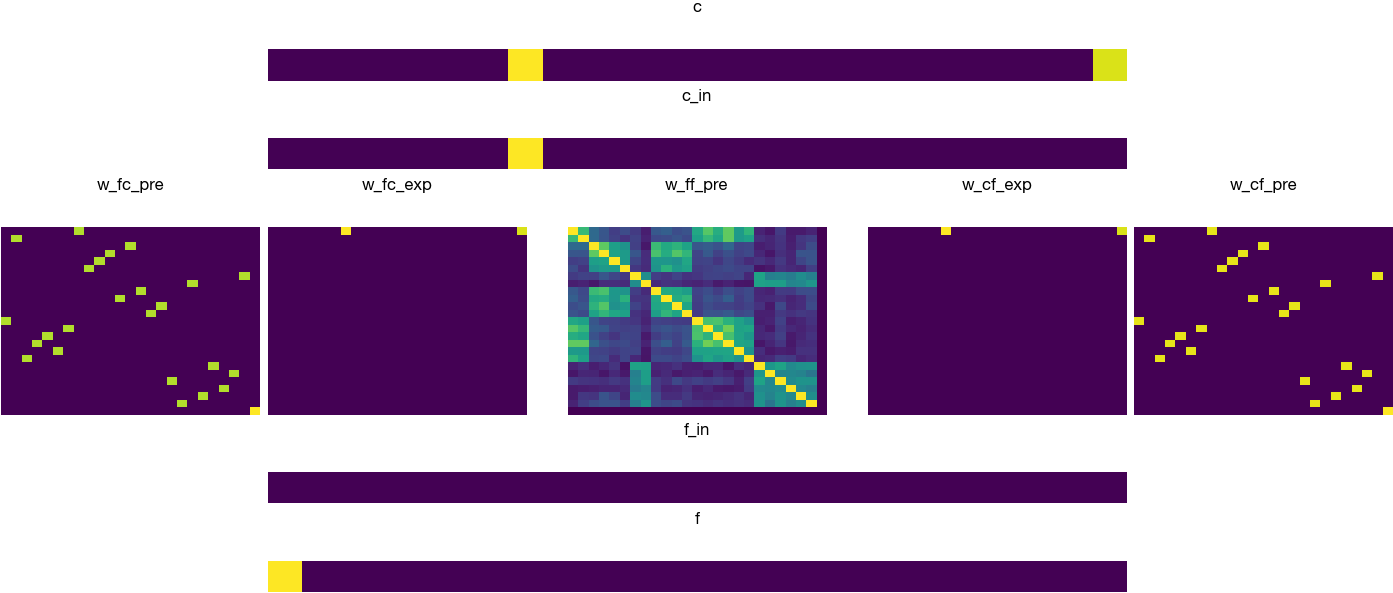

In [5]:
%matplotlib widget
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

# initialize the plot
fig, ax = network.init_plot(figsize=(14, 6))
state[0].plot(ax=ax)

def update(n=1):
    """Update network data on reach time step."""
    ax['c'].images[0].set_data(state[n].c[None, :])
    ax['c_in'].images[0].set_data(state[n].c_in[None, :])
    ax['f'].images[0].set_data(state[n].f[None, :])
    f_in = state[n].f_in
    ax['f_in'].images[0].set_data(f_in[None, :])
    ax['f_in'].images[0].set_clim(np.min(f_in), np.max(f_in))
    ax['w_fc_exp'].images[0].set_data(state[n].w_fc_exp)
    ax['w_cf_exp'].images[0].set_data(state[n].w_cf_exp)

w = interactive(update, n=widgets.IntSlider(min=0, max=len(state) - 1, step=1, value=0))
display(w)